# Introduction

This tutorial will allow you to gain a deeper understanding of your relationships with your friends, along with your messaging habits! We will be analyzing Facebook messages, which I received from Facebook archives. For the purpose of this tutorial, I will be analyzing my conversations with all of my Facebook friends (including group chats!) that I talk to/have talked to the most during my time on Facebook. That's almost 3,000 conversations (excluding my conversation with my best friend of 5 years, since that was almost 150MB of data) and millions of messages! 

I will be running different python functions to analyze some very interesting insights about my conversation histories, including most used words, average conversation lengths, sentiment towards certain friends (using TextBlob), etc. Doing all of this will be very intensive, since I will be parsing through literally thousands of messages -- some which have spanned for years. 

Nevertheless, I'll be walking you through every step of the way, from downloading your data to finding out who you need to be nicer to! 

__Warning! There is some explicit language in parts of the analysis. Unfortunately, my FB message history is not as clean as I would like. But I do not want to tamper with the data, as it does say a lot about me and my messaging style.__

### Tutorial Content

We will cover the following topics in this tutorial:
1. [Downloading your Facebook data](#Downloading-your-Facebook-data)
2. [Parsing through your messages](#Parsing-through-your-messages)
3. [Most Used Words](#Most-Used-Words)
4. [Birthday Messages](#Birthday-Messages)
5. [Sentiment Analysis](#Sentiment-Analysis)

## Downloading your Facebook data

- Go to www.facebook.com/settings
- Click "Download a copy of your Facebook data."
- Click "Download Archive."
- It might take anywhere between a few minutes to a few hours, but Facebook will alert you when your archive is ready.
- When it is finished, click "Download Archive" again, and a zip file will download to your computer.



## Parsing through your messages

Facebook returns all of your individual conversations as html files, which is not ideal. Thus, I used a library called "fb-messages-to-json" (does exactly what it sounds like). You can find this library here: https://github.com/hey-johnnypark/fb-messages-to-json

There are two node dependencies that you need to install in order to run fb-messages-to-json:
- npm install cheerio
- npm install optimist

Once you download the folder fb-messages-to-json-master from github, you are going to want to run it on each message file:
1. Rename the fb-messages-to-json-master to "MessageParser". 
2. Separate the __'messages'__ folder from the __Facebook archive__ and __insert it__ into the __'MessageParser'__ folder.
3. Within the __'messages'__ folder, delete the folders _'stickers', 'audio', 'files', 'photos', 'gifs', 'videos'_. 
3. Create an empty folder in __'MessageParser'__ called __'json'__
4. Retrieve the count of how many files are within the __'messages'__ folder. 
5. Run the python script below, where __n__ is the number of message files you have (Facebook tells you). 

I've written a python script that does exactly that - it will iterate through every [message#].html file and construct a [message#].json file within the __json__ folder.

In [1]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob
import collections

In [2]:
def iterate(n):
    i = 0
    while(i<n):
        z = str(i)
        #the line below runs the fb-message-to-json command n times and creates n json files. 
        os.system("node fb-messages-to-json.js -i messages/" + z + ".html -o json/" + z + ".json")
        i += 1

Now, we have a __json__ folder with n json files. We will now create a list of those json file paths.

In [3]:
path_to_json = 'json/'
json_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]

We will be referring to json_files throughout the tutorial. It is the list of all our json file paths (AKA our messages!) Now, time to do some cool stuff with them!

## Most Used Words

In this section, I'll be doing two variations of finding out what your most used words are:
1. Top _ words of at least length n, overall messages.
2. Top _ words of at least length x, of your messages with a specific person.

When parsing through the words, there are certain words that I choose to __exclude__ (such as "lol", "a", "the", etc.), for the purpose of having a more personalized output. I am using a txt file of ~10,000 common english words that I will be ignoring for the purpose of this function. 

The results will be returned in the form of a __word cloud__.

In [4]:
commonfile = open('common.txt','r')
commonWords = set([line.rstrip("\n") for line in commonfile.readlines()])

In [5]:
def mostUsedOverall(top, n):
    words = {}
    #iterate through each message (json file)
    for file in json_files:
        with open('json/' + file, 'r') as myFile:
            text = myFile.read()

        obj = json.loads(text)

        obj=obj[0]['messages']

        for msg in obj:
            #only check messages I've sent
            if(msg['user']=="Zuhayer Quazi"):
                t = msg['text'].split()
                for x in t:
                    y= x.lower()
                    y = y.replace("'", "")
                    #eliminate short words,  common words, and urls, "lools", and "hahaha's"
                    if(len(y)<n or y[0:3]=="lol" or y[0:3]=="loo" or ("hah" in y) or y[0:4]=="www." or y[0:4] == "http" or y in commonWords):
                        pass
                    #add to dictionary or increment
                    elif x not in words:
                        words[x] = 1
                    else:
                        words[x] += 1

    #get most common words (user specified number)
    newWord = sorted(words, key=words.get, reverse=True)[:top]

    #build wordcloud
    cloud = {}
    for word in newWord:
        cloud[word] = words[word]
    wc = WordCloud(background_color="white").generate_from_frequencies(cloud)
    plt.figure(figsize=(8,8))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

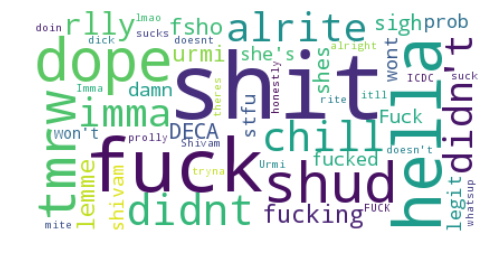

In [6]:
mostUsedOverall(50,4)

You can see above is the top 50 words of at least length 4 that I have used throughout my time on Facebook (~6 Years). It is interesting to see the slang that I use, such as __"hella"__ and __"dope"__. Excuse me for the language!

In [7]:
def mostUsedUser(top, n, name):
    #iterate through each message
    words = {}
    for file in json_files:
        with open('json/' + file, 'r') as myFile:
            text = myFile.read()

        obj = json.loads(text)

        obj=obj[0]['messages']
        correct = False
        for msg in obj:
            #only check messages I've sent
            if(name in msg['user']):
                correct = True
            if(msg['user']=="Zuhayer Quazi" and correct):
                t = msg['text'].split()
                for x in t:
                    y= x.lower()
                    y = y.replace("'", "")
                    #eliminate short words,  common words, and urls, "lool's", and "hahaha's".
                    if(len(y)<n or y[0:3]=="loo" or ("hah" in y) or y[0:4]=="www." or y[0:4] == "http" or y in commonWords):
                        pass
                    #add to dictionary or increment
                    elif y not in words:
                        words[y] = 1
                    else:
                        words[y] += 1

    #get most common words (user specified)
    newWord = sorted(words, key=words.get, reverse=True)[:top]

    #build wordcloud
    cloud = {}
    for word in newWord:
        cloud[word] = words[word]
    wc = WordCloud(background_color="white").generate_from_frequencies(cloud)
    plt.figure(figsize=(8,6))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

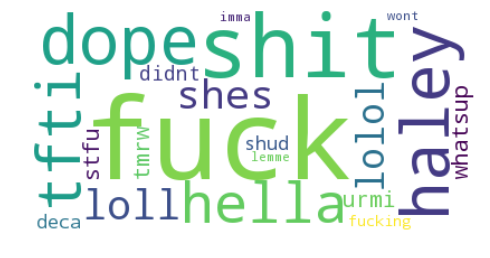

In [8]:
mostUsedUser(20, 4, "Alisa Su")

Above are the top 20 words of at least length 4 that I have used in my conversations with Alisa Su, one of my closest friends who I have hundreds of thousands of messages with. 

## Birthday Messages

In this section, I will be analyzing my friendships/relationships on a deeper level -- what true friend does not message you on your birthday?! So, this next two functions are meant to provide an understanding of:

1. How many birthday messages you have gotten over the past few years (by year)
2. Which friends have messaged you consistently throughout your birthdays.

Because I've only been on Facebook for 6 years (from 2012), and my birthday is in August, I will be analyzing messages from the years 2012-2017.

I essentially iterate through the messages, checking for a few things:
1. The person that sent the message is not me.
2. It was sent on my birthday.
3. The message they sent was an actual __birthday message__. (Do this by checking my list of 'birthday' words).


In [9]:
def freq():
    result = {'2012':0, '2013':0,'2014':0, '2015':0,'2016':0,'2017':0}
    #words I use to check if they messaged me happy birthday :)
    birthdaywords = ['birthday', 'happy', 'hbd', 'bday', 'birthday!', 'Birthday', 'Happy', 'Bday', 'Birthday!']
    
    for file in json_files:
        with open('json/' + file, 'r') as myFile:
            text = myFile.read()

        obj = json.loads(text)

        obj=obj[0]['messages']

        for msg in obj:
            #check that someone else sent me a message on August 17 (my birthday)
            if(msg['user']!="Zuhayer Quazi" and "August 17" in msg['date']):
                done = True
                for bdayword in birthdaywords:
                    #done variable is put in place to ensure I do not double count
                    if bdayword in msg['text'] and done:
                        done = False
                        for key in result:
                            if key in msg['date']:
                                result[key] += 1
    x = []
    y = []
    for key in result:
        x.append(key)
        y.append(result[key])
    plt.figure(figsize=(6,6))
    plt.title("Birthday Wishes Per Year")
    plt.xlabel("Year")
    plt.ylabel("Number of Wishes")
    plt.plot(x,y)
    plt.show()


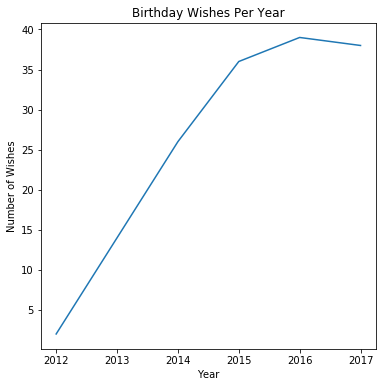

In [10]:
freq()

As you can see, I received an increasing number of wishes/year until 2016, which was my senior year in high school. This past year, my numbers have gone down. __Does this mean that I peaked in high school?__

In [11]:
def friendWishes():
    result = {}
    birthdaywords = ['birthday', 'happy', 'hbd', 'bday', 'birthday!', 'Birthday', 'Happy', 'Bday', 'Birthday!']
    for file in json_files:
        with open('json/' + file, 'r') as myFile:
            text = myFile.read()

        obj = json.loads(text)

        obj=obj[0]['messages']

        for msg in obj:
            if(msg['user']!="Zuhayer Quazi" and "August 17" in msg['date']):
                name = msg['user'].split()
                if(len(name)>0):
                    name = name[0]
                    done = True
                    for bdayword in birthdaywords:
                        if bdayword in msg['text'] and done:
                            if name not in result:
                                result[name] = 1
                            else:
                                result[name] += 1
                            done = False
    results = sorted(result, key=result.get, reverse=True)[:15]
    x = []
    y = []
    for frnd in results:
        x.append(frnd)
        y.append(result[frnd])
    indexes = np.arange(len(x))
    bar_width = 0.05
    plt.figure(figsize=(8,8))
    plt.barh(indexes,y, color='pink', align='center')
    plt.title("Birthday Messages")
    plt.xlabel('Frequency (2012-2017)')
    plt.ylabel('Friend Name')
    plt.yticks(indexes+bar_width, x)
    plt.show()     

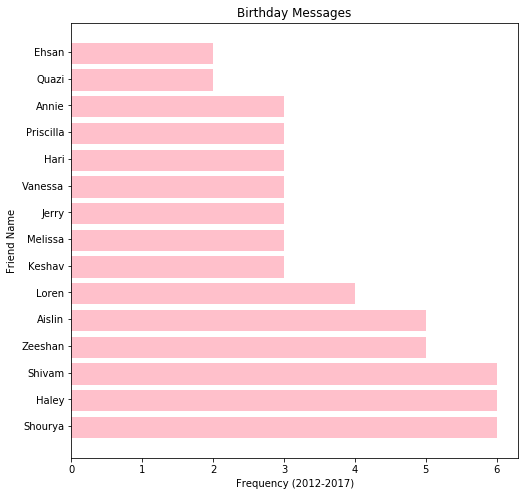

In [12]:
friendWishes()

Above shows my __top 10 friends__ who have messaged me consistently throughout the years, wishing me a happy birthday. Shoutout to Shourya, Haley, and Shivam for wishing me every year!

## Sentiment Analysis

Lastly, I will be covering some basic sentiment analysis, utilizing TextBlob's sentiment analysis library.

I will split this section into two parts:
1. The average sentiment of your messages towards a certain individual (passed as a parameter).
2. A list of the people you are the __nicest__ to and __not nice__ to. That is, the individuals that you have the highest/lowest sentiment scores with. 

TextBlob returns a sentiment and subjectivity (sarcasm/variance) score for each analysis - I will be averaging the totals of each based on the number of messages. 

The sentiment score that TextBlob returns is between __-1.0 and 1.0__. A score of -1.0 signifies a very negative sentiment, a score of 0 represents a neutral sentiment, and a score of 1.0 shows an extremely positive sentiment. 

Here is an example of TextBlob sentiment analysis in action:

In [13]:
t1 = TextBlob("I hate the Green Bay Packers")
print(t1.sentiment)
t2 = TextBlob("I love the Minnesota Vikings")
print(t2.sentiment)
t3 = TextBlob("My name is Zuhayer")
print(t3.sentiment)

Sentiment(polarity=-0.5, subjectivity=0.6)
Sentiment(polarity=0.5, subjectivity=0.6)
Sentiment(polarity=0.0, subjectivity=0.0)


In [14]:
def sentiment(friend):  
    total = 0
    polarity = 0
    subjectivity = 0
    
    for file in json_files:
        with open('json/' + file, 'r') as myFile:
            text = myFile.read()

        obj = json.loads(text)

        obj=obj[0]['messages']
        talking_to_frnd = False
        for msg in obj:
            #only check messages I've sent
            if(friend in msg['user']):
                talking_to_frnd = True
            if(msg['user']=="Zuhayer Quazi" and talking_to_frnd):
                t = TextBlob(msg['text'])
                x, y = t.sentiment
                polarity += x
                subjectivity += y
                total += 1
    sentiment = (polarity/total)*1000 / 1000
    sentiment = "%.3f" % sentiment
    subject = (subjectivity/total)*1000 / 1000
    subject = "%.3f" % subject
    print("Overall sentiment w/ " + friend + " = " + str(sentiment))
    print("Subjectivity w/ " + friend + " = " + str(subject))
    print("")

I will be testing this sentiment analysis on my conversations with a few of my closest friends. It will be interesting to see, since I tend to be very sarcastic with my close friends over Facebook Messenger. 

In [15]:
sentiment("Shivam Patel")
sentiment("Aislin Liu")
sentiment("Alisa Su")
sentiment("Annie Meng")

Overall sentiment w/ Shivam Patel = 0.081
Subjectivity w/ Shivam Patel = 0.232

Overall sentiment w/ Aislin Liu = 0.096
Subjectivity w/ Aislin Liu = 0.258

Overall sentiment w/ Alisa Su = 0.071
Subjectivity w/ Alisa Su = 0.245

Overall sentiment w/ Annie Meng = 0.106
Subjectivity w/ Annie Meng = 0.264



As we can see, I have slightly positive sentiment scores with each of my above friends. This does not really surprise me, however. The variance/subjectivity score for each conversation is relatively high, showing that there is a decent amount of variablity/sarcasm there. 

Now, I will be analyzing my overall sentiment to each friend I have talked to over FB Messenger. I do this by creating a dictionary of users (as keys -- the person I am responding/talking to), in which I store the sentiment values and total message count (as values). From there, I analyze each message's sentiment score using TextBlob, and update my dictionary.

I then compute the total sentiment score (sentiment_total/#of_messages) and sort the values.

For the purpose of this function, I will only be analyzing individuals who I have sent __at least 100 messages__ to.

In [16]:
def sentimentOverall():
    #iterate through each message
    result = {}
    for file in json_files:
        with open('json/' + file, 'r') as myFile:
            text = myFile.read()

        obj = json.loads(text)

        obj=obj[0]['messages']
        name = 'Zuhayer Quazi'
        for msg in obj:
            #only check messages I've sent
            if msg['user'] != 'Zuhayer Quazi' and msg['user'] != '':
                name = msg['user']
            if(name != "Zuhayer Quazi" and name not in result):
                result[name] = [0,1]
            if(name!='Zuhayer Quazi' and msg['user']=="Zuhayer Quazi"):
                t = TextBlob(msg['text'])
                x, y = t.sentiment
                result[name][0] += x
                result[name][1] += 1
    newResult = {}
    for key in result:
        if(result[key][1] > 100):
            sent = (result[key][0]/result[key][1])*1000/1000
            sent = float("%.3f" % sent)
            newResult[key] = []
            newResult[key].append(result[key][1])
            newResult[key].append(sent)
    best = sorted(newResult.items(), key=lambda e:e[1][1], reverse=True)[:10]
    worst = sorted(newResult.items(), key=lambda e:e[1][1], reverse=False)[:10]
    print("You are really positive to:")
    for person, score in best:
        print(person, str(newResult[person][1]), ", total messages: " + str(newResult[person][0]))
    print("")
    print("Why are you so negative to:")
    for person, score in worst:
        print(person, str(newResult[person][1]), ", total messages: " + str(newResult[person][0]))


In [17]:
sentimentOverall()

You are really positive to:
Caitlin Chan 0.325 , total messages: 101
Ashi Kodi 0.261 , total messages: 506
Uma Kirloskar 0.248 , total messages: 777
Gopika Nair 0.234 , total messages: 321
Kunal Rondo Mehta 0.225 , total messages: 115
Steven Ngo 0.221 , total messages: 129
Shreya Hegde 0.214 , total messages: 313
Megan Roche 0.21 , total messages: 247
Vincent Tran 0.206 , total messages: 173
Varun Mathuria 0.204 , total messages: 1131

Why are you so negative to:
Shafayat Taha -0.013 , total messages: 110
Joanna Yeh -0.011 , total messages: 183
Cindy Kim -0.009 , total messages: 162
Rahul Krishnan 0.004 , total messages: 181
Fatima Ijaz 0.007 , total messages: 140
Pooja Kumar 0.011 , total messages: 608
Albert Tran 0.012 , total messages: 152
Connor Latham 0.014 , total messages: 154
Twentyei Chawla 0.016 , total messages: 140
Will Jeziorski 0.018 , total messages: 211


Let's take a closer look at my 'negative' section. It is interesting to see that only the top 3 of my negative list actually have negative scores. That is, I tend to have slightly positive conversations with most of the people I actually converse with. Who knew?!

# Conclusion

In conclusion, this tutorial should give you a better look at your social media life and relationships. From analyzing your birthday wishes/year you can probably figure out who your real friends are, as well as how many new relationships you're building every year + how many you retain. From the sentiment analysis, you can see who you may need to be nicer to (or continue being nice to). And finally, from the most used words, you can how you converse with different people, and which words/slang make up your 'typing style'! 

Overall, I believe that there is so much more that you can do with your messaging history to gain even more in depth analytics about your relationships with people. Some examples include analyzing response times, average conversation length, two-way sentiment analysis (see how they talk to you). But for now, enjoy these tools!